# Deep Learning Keras
# Xiaoqiao Zeng

In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# TensorFlow / Keras functions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

1. Load the Ames Housing dataset. Create dummy variables for all of the categorical features. Print the first few rows of this dataset. (5 pts)

In [16]:
ames = pd.read_csv('ames.csv')
ames.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [17]:
df=pd.get_dummies(ames, drop_first=True)
df.head()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,0,0,0,0,1,0,0,0,1,0
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,0,1,0,0,0,1,0
2,81,14267,1958,1958,108,1,0,406,1329,1329,...,0,0,0,0,1,0,0,0,1,0
3,93,11160,1968,1968,0,1,0,1045,2110,2110,...,0,0,0,0,1,0,0,0,1,0
4,74,13830,1997,1998,0,3,0,137,928,928,...,0,0,0,0,1,0,0,0,1,0


2. Use "Sale_Price" to create a column vector of responses (y). Create a feature matrix (X) using all of the other variables. (5 pts)

In [18]:
X=df.drop("Sale_Price", axis=1).values
y=df.Sale_Price.values.reshape(-1, 1)

In [19]:
X.shape

(2930, 306)

In [20]:
y.shape

(2930, 1)

In [79]:
y

array([[215000],
       [105000],
       [172000],
       ...,
       [132000],
       [170000],
       [188000]])

3. Split the data into training, validation, and testing sets using a 60/20/20 split. Print the dimensions of each of the feature matrices. (5 pts)

In [36]:
n = X.shape[0]  # total sample size, n
n20 = int(.2*n) # 20% of n
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n20, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=n20, random_state=2)

In [37]:
print('X shapes: ', X_train.shape, X_valid.shape, X_test.shape)
print('y shapes: ', y_train.shape, y_valid.shape, y_test.shape)

X shapes:  (1758, 306) (586, 306) (586, 306)
y shapes:  (1758, 1) (586, 1) (586, 1)


4. Standardize both the features and responses from the training set. Apply the appropriate transformation to the validation and test sets. (10 pts)

Note: standardizing the dummy variables is optional. It's OK if you leave them as is, and it's also OK to standardize them. 

In [68]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_valid = scaler_x.transform(X_valid)
X_test = scaler_x.transform(X_test)

In [69]:
scaler_y = StandardScaler()  
y_train = scaler_y.fit_transform(y_train)
y_valid = scaler_y.transform(y_valid)
y_test = scaler_y.transform(y_test)

5. Before we fit a neural network, we'll first try a simpler model using the Lasso. Fit a Lasso regression model to the training set using alpha=.05 as the tuning parameter. This should be a good choice assuming the data has been standardized. Calculate the mean squared error (MSE) on the training, validation, and test sets. (10 pts)
Note: We did not use the validation set yet, so this is just another test set. We will use one when training the neural network, but we shouldn't train the Lasso with it for a fair comparison. 

In [70]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=.05)
lasso.fit(X_train, y_train)
print('MSE of training set:', mean_squared_error(y_train, lasso.predict(X_train)))
print('MSE of valid set:', mean_squared_error(y_valid, lasso.predict(X_valid)))
print('MSE of test set:', mean_squared_error(y_test, lasso.predict(X_test)))

MSE of training set: 0.15662416279515554
MSE of valid set: 0.14813466441967296
MSE of test set: 0.11620386153587978


6. Fit a neural network using the following architecture, and print the output from training. (15 pts) Use 2 hidden layers with 50 neurons each; Use ReLU activation functions for the hidden layers; Use a linear activation function for the output layer; Use MSE for the loss function; Use the Adam optimizer; Use 100 epochs; Use a batch size of 100.

In [71]:
model1 = Sequential()
model1.add(Dense(50, activation='relu', input_shape=(X_train.shape[1], )))
model1.add(Dense(50, activation='relu', input_shape=(X_train.shape[1], )))
model1.add(Dense(1, activation='linear'))

model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 50)                15350     
_________________________________________________________________
dense_21 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 51        
Total params: 17,951
Trainable params: 17,951
Non-trainable params: 0
_________________________________________________________________


In [72]:
model1.compile(optimizer='adam',
               loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [73]:
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=100,
                     validation_data=(X_valid, y_valid))

Train on 1758 samples, validate on 586 samples
Epoch 1/100
1758/1758 [==============================] - 1s 325us/sample - loss: 0.6980 - mean_squared_error: 0.6980 - val_loss: 0.3967 - val_mean_squared_error: 0.3967
Epoch 2/100
1758/1758 [==============================] - 0s 38us/sample - loss: 0.2575 - mean_squared_error: 0.2575 - val_loss: 0.2768 - val_mean_squared_error: 0.2768
Epoch 3/100
1758/1758 [==============================] - 0s 38us/sample - loss: 0.1575 - mean_squared_error: 0.1575 - val_loss: 0.2409 - val_mean_squared_error: 0.2409
Epoch 4/100
1758/1758 [==============================] - 0s 37us/sample - loss: 0.1097 - mean_squared_error: 0.1097 - val_loss: 0.2233 - val_mean_squared_error: 0.2233
Epoch 5/100
1758/1758 [==============================] - 0s 38us/sample - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.2143 - val_mean_squared_error: 0.2143
Epoch 6/100
1758/1758 [==============================] - 0s 36us/sample - loss: 0.0662 - mean_squared_error: 0.0

1758/1758 [==============================] - 0s 51us/sample - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.1737 - val_mean_squared_error: 0.1737
Epoch 98/100
1758/1758 [==============================] - 0s 47us/sample - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.1749 - val_mean_squared_error: 0.1749
Epoch 99/100
1758/1758 [==============================] - 0s 57us/sample - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.1728 - val_mean_squared_error: 0.1728
Epoch 100/100
1758/1758 [==============================] - 0s 41us/sample - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.1742 - val_mean_squared_error: 0.1742


7. Print the MSE from the test set using the model in (6). How does this compare to the Lasso? (5 pts)

In [74]:
print('MSE of test set:', mean_squared_error(y_test, model1.predict(X_test)))

MSE of test set: 0.13776470854712644


In [106]:
print('MSE ratio of model1 to Lasso model:', mean_squared_error(y_test, model1.predict(X_test))/mean_squared_error(y_test, lasso.predict(X_test)))

MSE ratio of model1 to Lasso model: 1.1855432919893925


Answer: The MSE is a little bit larger than Lasso

8. Optimize the neural network you fit in Q6 to get a better MSE than the Lasso model. You should use the validation set to ensure you're not overfitting. Print the output from training this model. Consider changing the following components to improve performance (it's not required to change all of these). (20 pts)
Number of layers;
Number of neurons per layer;
Number of epochs and batch size;
Activation functions of hidden layers;
Adding regularization (Dropout layers, L1/L2 penalties, early stopping).
Note: if for some reason the neural net from Q6 is already better than the Lasso model, then you should instead attempt to reduce the neural net's test MSE by 1%. 

In [1]:
model2 = Sequential()
model2.add(Dense(50, activation='relu', input_shape=(X_train.shape[1], )))
model2.add(Dense(50, activation='relu',  input_shape=(X_train.shape[1], )))
#model2.add(Dense(100, activation='relu', input_shape=(X_train.shape[1], )))
model2.add(Dropout(0.5, input_shape=(X_train.shape[1], )))
model2.add(Dense(1, activation='linear'))

model2.summary()

NameError: name 'Sequential' is not defined

In [99]:
model2.compile(optimizer='adam',
               loss='mean_squared_error',
              metrics=['mean_squared_error'])
#early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [100]:
history2 = model2.fit(X_train, y_train, epochs=200, batch_size=200,
                     validation_data=(X_valid, y_valid))

Train on 1758 samples, validate on 586 samples
Epoch 1/200
1758/1758 [==============================] - 1s 399us/sample - loss: 1.6670 - mean_squared_error: 1.6670 - val_loss: 0.6975 - val_mean_squared_error: 0.6975
Epoch 2/200
1758/1758 [==============================] - 0s 29us/sample - loss: 1.0358 - mean_squared_error: 1.0358 - val_loss: 0.4688 - val_mean_squared_error: 0.4688
Epoch 3/200
1758/1758 [==============================] - 0s 24us/sample - loss: 0.7212 - mean_squared_error: 0.7212 - val_loss: 0.3471 - val_mean_squared_error: 0.3471
Epoch 4/200
1758/1758 [==============================] - 0s 27us/sample - loss: 0.6353 - mean_squared_error: 0.6353 - val_loss: 0.3212 - val_mean_squared_error: 0.3212
Epoch 5/200
1758/1758 [==============================] - 0s 29us/sample - loss: 0.5533 - mean_squared_error: 0.5533 - val_loss: 0.2951 - val_mean_squared_error: 0.2951
Epoch 6/200
1758/1758 [==============================] - 0s 26us/sample - loss: 0.4236 - mean_squared_error: 0.4

1758/1758 [==============================] - 0s 25us/sample - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.1326 - val_mean_squared_error: 0.1326
Epoch 98/200
1758/1758 [==============================] - 0s 27us/sample - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.1401 - val_mean_squared_error: 0.1401
Epoch 99/200
1758/1758 [==============================] - 0s 25us/sample - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.1329 - val_mean_squared_error: 0.1329
Epoch 100/200
1758/1758 [==============================] - 0s 31us/sample - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.1359 - val_mean_squared_error: 0.1359
Epoch 101/200
1758/1758 [==============================] - 0s 26us/sample - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.1364 - val_mean_squared_error: 0.1364
Epoch 102/200
1758/1758 [==============================] - 0s 26us/sample - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.1375 - val_mean_squared_error: 0.1

Epoch 145/200
1758/1758 [==============================] - 0s 34us/sample - loss: 0.0676 - mean_squared_error: 0.0676 - val_loss: 0.1322 - val_mean_squared_error: 0.1322
Epoch 146/200
1758/1758 [==============================] - 0s 35us/sample - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.1367 - val_mean_squared_error: 0.1367
Epoch 147/200
1758/1758 [==============================] - 0s 36us/sample - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.1325 - val_mean_squared_error: 0.1325
Epoch 148/200
1758/1758 [==============================] - 0s 31us/sample - loss: 0.0702 - mean_squared_error: 0.0702 - val_loss: 0.1338 - val_mean_squared_error: 0.1338
Epoch 149/200
1758/1758 [==============================] - 0s 33us/sample - loss: 0.0796 - mean_squared_error: 0.0796 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 150/200
1758/1758 [==============================] - 0s 37us/sample - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.1307 - val_mean_sq

9. Print the MSE from the test set using the model in Q8. (5 pts) 

In [101]:
print('MSE of test set:', mean_squared_error(y_test, model2.predict(X_test)))

MSE of test set: 0.10194027388038597


In [105]:
print('MSE ratio of optimized model to Lasso model:', mean_squared_error(y_test, model2.predict(X_test))/mean_squared_error(y_test, lasso.predict(X_test)))

MSE ratio of optimized model to Lasso model: 0.8772537550218182


10. Plot the training and validation MSE for each epoch. (10 pts)

In [88]:
#model2.history.history['val_mean_squared_error']

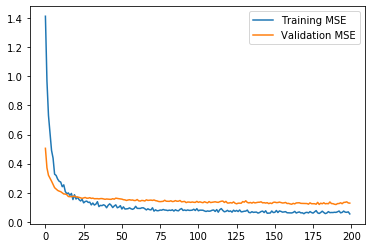

In [93]:
plt.plot(model2.history.history['mean_squared_error'], label='Training MSE')
plt.plot(model2.history.history['val_mean_squared_error'], label='Validation MSE')
plt.legend()
#validation may good for new tests set

11. In a few sentences, describe how you optimized the model in Q8. Did you find that changing certain components had bigger effects on the error rate? (5 pts)

I increased a hidden layer with 100 neurons, and also increased Number of epochs and batch size for larger neuron numbers, and received a larger MSE. Then I changed the added regularization L1/L2 penalties to layers, and I still got a larger MSE. Even with early stopping, the MSE increased still. So I felt the original number of neurons could be already high. Thus, I removed the addition hidden layer and add dropout layers, while keeping larger epochs and batch. Finally the MSE reduced lower than that of Lasso model.

12. How do you know that your model is not overfitting? That is, how do you know you didn't get lucky on the test set? (5 pts)

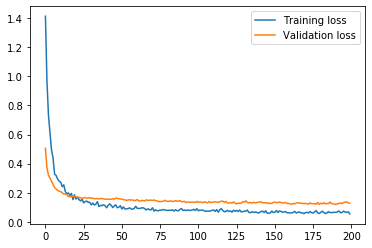

In [94]:
plt.plot(model2.history.history['loss'], label='Training loss')
plt.plot(model2.history.history['val_loss'], label='Validation loss')
plt.legend()

I looked at both the validation output and the Train/validation MSE/loss plot. If an overfitting happens, the values of MSE and loss would show oscillating behaviors or went up from a lowest point. If it is not overfitted, the values would drop at the initial validation stage then keep stable at a specific level, like the orange curves shown in my plots. 